# DansLearnings

## Reading Files into Python

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [9]:
#importing data
data_path="D:/shared_drive/Analytics Vidhya/csv_files/churn_prediction.csv"
data = pd.read_csv(data_path)

In [10]:
#Important general Pandas functions
data.index #shows the index of  a dataframe
data.head() #first 5 or X rows
data.tail() #last 5 or X rows
data.shape # number of rows and columns
data.columns  # list all columns
data.isnull().sum() # counts the number of null values in all 
data.dtypes # brings back columns and datatypes
data['churn'].astype('category') #converts data type to category
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender              object
occupation          object
last_transaction    object
dtype: object

In [11]:
#important data functions
date = pd.DatetimeIndex(data['last_transaction']) # day of week when last transaction was done

data['doy_ls_tran'] = date.dayofyear  # extracts day of year
data['woy_ls_tran'] = date.isocalendar().week.values # extracts iso week
data['dow_ls_tran'] = date.dayofweek # extracts day of week
data['moy_ls_tran'] = date.month # extracts month


In [12]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [13]:
#statistical pandas functions
stat_func_d={}
i="age"
stat_func_d["mini"] = data[i].min()
stat_func_d["maxi"] = data[i].max()
stat_func_d["ran"] = data[i].max() - data[i].min()
stat_func_d["mean"] = data[i].mean()
stat_func_d["median"] = data[i].median()
stat_func_d["quant25"] = data[i].quantile(0.25)
stat_func_d["quant75"] = data[i].quantile(0.75)
stat_func_d["IQR"] = stat_func_d["quant75"] - stat_func_d["quant25"]
stat_func_d["st_dev"] = data[i].std()
stat_func_d["skew"] = data[i].skew()  #skewness focuses on the symmetry and direction of tail length
stat_func_d["kurt"] = data[i].kurtosis() #kurtosis focuses on the thickness of tails and sharpness of the distribution's peak
stat_func_d

{'mini': 1,
 'maxi': 90,
 'ran': 89,
 'mean': 48.208336269466564,
 'median': 46.0,
 'quant25': 36.0,
 'quant75': 60.0,
 'IQR': 24.0,
 'st_dev': 17.807163372966425,
 'skew': 0.33058929557517264,
 'kurt': -0.16866785691275865}

In [14]:
#correlations methoden
#pearson, is best for continuous, normally distributed data with a linear relationship
#kendall
#spearman
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
correlations = ['pearson','kendall','spearman']
i=correlations[1]
numerical.corr(method=i)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,dow_ls_tran,moy_ls_tran
customer_id,1.000000,-0.004825,-0.000020,-0.003203,0.000929,0.007224,-0.000006,0.003080,-0.000775,0.002518,...,0.002016,-0.003742,-0.002636,0.001756,0.002062,0.000180,-0.002219,-0.006901,0.006687,-0.004655
vintage,-0.004825,1.000000,0.004953,0.002181,0.004012,-0.004188,0.001395,0.007542,0.008578,0.010290,...,0.003821,-0.003457,0.001504,0.001732,0.007994,0.010379,-0.003620,0.003214,-0.008478,0.001423
age,-0.000020,0.004953,1.000000,0.018618,0.010568,-0.055159,-0.049779,0.052832,0.052484,0.069332,...,0.015046,0.017384,-0.004451,-0.002656,0.058452,0.062037,-0.018891,0.010533,-0.013244,0.014750
dependents,-0.003203,0.002181,0.018618,1.000000,0.003134,0.004300,0.000318,-0.001225,-0.000425,0.010708,...,0.093200,0.097421,0.140124,0.140288,0.005379,0.002795,0.044984,0.087639,-0.002771,0.095648
city,0.000929,0.004012,0.010568,0.003134,1.000000,0.007122,-0.040817,-0.005910,-0.006675,-0.004871,...,0.004414,0.003244,0.003225,0.001852,-0.007095,-0.003810,-0.002688,0.000145,-0.002481,0.002439
customer_nw_category,0.007224,-0.004188,-0.055159,0.004300,0.007122,1.000000,0.213359,-0.120272,-0.115060,-0.160004,...,-0.056159,-0.052383,-0.036830,-0.044941,-0.135213,-0.135555,0.007743,-0.050178,0.010679,-0.051557
branch_code,-0.000006,0.001395,-0.049779,0.000318,-0.040817,0.213359,1.000000,-0.010473,-0.003982,-0.012807,...,-0.019482,-0.025582,-0.009775,-0.020904,-0.009896,-0.008518,0.027202,-0.035154,0.008017,-0.035373
current_balance,0.003080,0.007542,0.052832,-0.001225,-0.005910,-0.120272,-0.010473,1.000000,0.635254,0.612960,...,0.064688,0.031789,-0.051444,-0.042580,0.794308,0.557326,-0.230826,0.050178,-0.004792,0.043271
previous_month_end_balance,-0.000775,0.008578,0.052484,-0.000425,-0.006675,-0.115060,-0.003982,0.635254,1.000000,0.701258,...,-0.018733,0.060934,0.058625,-0.037343,0.741253,0.768212,-0.065768,-0.003646,0.000519,-0.011430
average_monthly_balance_prevQ,0.002518,0.010290,0.069332,0.010708,-0.004871,-0.160004,-0.012807,0.612960,0.701258,1.000000,...,0.042275,0.053698,0.066340,0.061064,0.716662,0.800327,0.020380,0.023948,-0.001644,0.024415


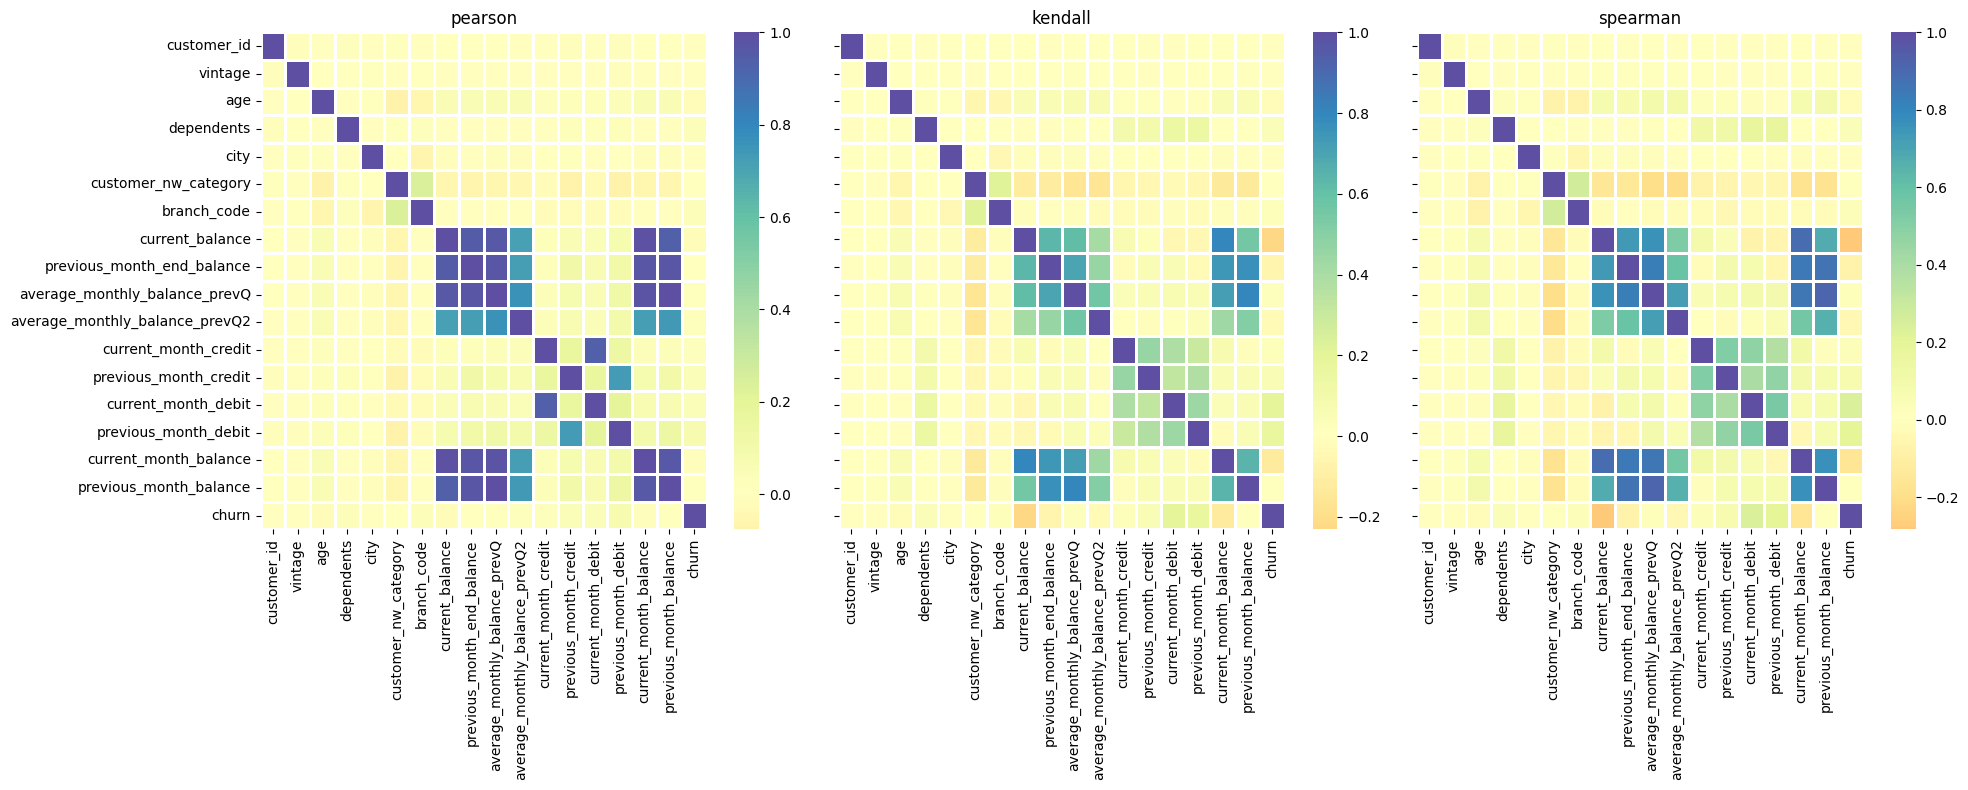

In [10]:
correlations = ['pearson','kendall','spearman']
fig, axes = plt.subplots(1, 3, figsize=(20,8), sharey='all')
for i, ax in enumerate(axes.ravel()):
    sns.heatmap(numerical.corr(method=correlations[i]), linewidths=2, cmap='Spectral', center=0, ax=ax)
    axes[i].set_title(correlations[i])
plt.tight_layout()

In [25]:
corr_matrix=numerical.corr(method=i)
# Reset the index of the correlation matrix
corr_matrix_reset = corr_matrix.reset_index()

# Unpivot the correlation matrix using pd.melt()
melted_corr = pd.melt(corr_matrix_reset, id_vars='index', var_name='variable', value_name='correlation')

# Rename the 'index' column to 'variable_1'
melted_corr.rename(columns={'index': 'variable_1'}, inplace=True)
melted_corr

,variable_1,variable,correlation
0,customer_id,customer_id,1.000000
1,vintage,customer_id,-0.004825
2,age,customer_id,-0.000020
3,dependents,customer_id,-0.003203
4,city,customer_id,0.000929
...,...,...,...
436,previous_month_balance,moy_ls_tran,-0.008867
437,churn,moy_ls_tran,0.030346
438,doy_ls_tran,moy_ls_tran,0.848466
439,dow_ls_tran,moy_ls_tran,-0.050546


In [8]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

## 0Hypothesis Check

### Continuous-Categorical

In [ ]:
cont='vintage'
cat='churn'
category=1
val_churn = data[cont][data[cat]==category][:]
val_notchurn = data[cont][~(data[cat]==category)][:]

#calculating descriptives
n_churn= val_churn.shape[0]
n_notchurn = val_notchurn.shape[0]
mean_churn = val_churn.mean()
mean_notchurn = val_notchurn.mean()
std_churn= val_churn.std()
std_notchurn =  val_notchurn.std()


ovr_sigma = sqrt(std_churn**2/n_churn + std_notchurn**2/n_notchurn)

z = (mean_churn - mean_notchurn)/ovr_sigma  #Berechnung des Z - Wert nach obiger Formel
df = n_churn+n_notchurn-2

print(z)
pval = 2*(1 - norm.cdf(abs(z)))
tval = 2*(1 - t_dist.cdf(abs(z),df))

print(ovr_sigma)
print(z)
print("pval: " + str(pval)) #ist sinnvoll wenn alle relevanten Daten vorhanden sind. Pvalue mus größer sein als der alpha value
print("tval: " + str(tval)) #ist sinnvoll wenn man  nur einen kleinen Auszug der Daten hat


### Categorical-Categorical

In [13]:
d = data[['churn', 'gender']]
table = pd.crosstab(d['churn'], d['gender'])
chi, p, dof, expected = chi2_contingency(table)
print("chi: " + str(chi))
print("p: " + str(p))
print("dof : " + str(dof))
print("expected : " + str(expected))

chi: 11.270738823296812
p: 0.0007873838498074115
dof : 1
expected : [[ 9216.65028539 13486.34971461]
 [ 2092.34971461  3061.65028539]]
